In [4]:
import math

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import Matrix, solve, Eq

# Global constants
center_x = 0.5  
center_y = 0.5

# Refractive indices
n_air = 1.000293
n_water = 1.33

# Other global variables
factor = 0.5


In [5]:
def reflect_line_of_equal_length(incoming_vector, incidence_point, start_point):
    """
    Reflect an incoming vector across a normal vector at the point of incidence.

    Parameters:
    incoming_vector (tuple): The incoming vector as a tuple (x, y).
    incidence_point (tuple): The point of incidence as a tuple (x, y).
    start_point (tuple): The start point of the incoming vector as a tuple (x, y).

    Returns:
    sympy.Matrix: The end point of the reflected line.
    """

    # Calculate the length of the original line
    end_point = incidence_point
    original_line_vector = sp.Matrix(end_point) - sp.Matrix(start_point)
    length_of_original_line = original_line_vector.norm()
    
    # Calculate the normalized normal vector at the point of incidence
    normal_vector = (sp.Matrix(incidence_point) - sp.Matrix([center_x, center_y])).normalized()
    
    # Reflect the incoming vector across the normal vector
    reflected_vector = sp.Matrix(incoming_vector) - 2 * (sp.Matrix(incoming_vector).dot(normal_vector)) * normal_vector
    
    # Normalize the reflected vector and scale it to the length of the original line
    normalized_reflected_vector = reflected_vector.normalized()
    scaled_reflected_vector = normalized_reflected_vector * length_of_original_line
    
    # Calculate the end point of the reflected line
    reflected_line_end_point = sp.Matrix(incidence_point) + scaled_reflected_vector
    
    return reflected_line_end_point

In [6]:
def calculate_refracted_ray(incoming_vector, angle_of_refraction, normal_vector_notnormalized, clockwise=False):
    """
    Calculate the refracted ray vector given the incoming vector, angle of refraction, and normal vector.

    Parameters:
    incoming_vector (tuple): The incoming vector as a tuple (x, y).
    angle_of_refraction (float): Angle of refraction in degrees.
    normal_vector_notnormalized (tuple): The normal vector at the point of refraction.
    clockwise (bool): Flag to determine the direction of rotation. Default is False.

    Returns:
    sympy.Matrix: The refracted ray vector.
    """

    # Normalize vectors
    normal_vector_normalized = sp.Matrix(normal_vector_notnormalized).normalized()
    incoming_vector = sp.Matrix(incoming_vector).normalized()  

    # Convert angle to radians for computation
    angle_radians = sp.rad(angle_of_refraction)
    
    # Determine the direction of the cross product
    cross_product = normal_vector_normalized[0] * incoming_vector[1] - normal_vector_normalized[1] * incoming_vector[0]
    
    # If the cross product is negative, the incoming vector is on the left side of the normal and we need to rotate clockwise
    # If it's positive, the incoming vector is on the right side and we need to rotate counterclockwise
    if not clockwise:
        # Counter-Clockwise
        rotation_matrix = sp.Matrix([[sp.cos(angle_radians), -sp.sin(angle_radians)],
                                     [sp.sin(angle_radians), sp.cos(angle_radians)]])
    else:
        # Clockwise
        rotation_matrix = sp.Matrix([[sp.cos(angle_radians), sp.sin(angle_radians)],
                                     [-sp.sin(angle_radians), sp.cos(angle_radians)]])
    
    # Calculate the refracted ray vector
    refracted_vector = rotation_matrix * normal_vector_notnormalized
    
    return refracted_vector

In [7]:
def plot_tangent_line_at_point(incidence_point, line_length=.3):
    """
    Plot a tangent line at a given point on the circle.

    Parameters:
    incidence_point (tuple): The point at which the tangent line is to be plotted.
    line_length (float): Length of the tangent line segment to be plotted.

    Returns:
    None
    """

    # Compute the slope of the line from the center to the point (radius)
    delta_x = incidence_point[0] - center_x
    delta_y = incidence_point[1] - center_y
    
    # Check for vertical line to avoid division by zero
    if delta_x == 0:
        tangent_slope = float('inf')
    else:
        tangent_slope = -delta_x / delta_y

    # Define the line length for the tangent line segment
    delta_line = line_length / 2

    # Plotting the tangent line
    if tangent_slope == float('inf'):  # Vertical line
        x_vals = [incidence_point[0], incidence_point[0]]
        y_vals = [incidence_point[1] - delta_line, incidence_point[1] + delta_line]
    else:
        x_vals = [incidence_point[0] - delta_line, incidence_point[0] + delta_line]
        y_vals = [incidence_point[1] - delta_line * tangent_slope, incidence_point[1] + delta_line * tangent_slope]
    
    plt.plot(x_vals, y_vals, 'k:', label='Tangent Line')

In [8]:
def calculate_refraction_angle(incidence_degrees, n1, n2):
    """
    Calculate the refraction angle using Snell's Law.

    Parameters:
    incidence_degrees (float): Angle of incidence in degrees.
    n1 (float): Refractive index of the first medium.
    n2 (float): Refractive index of the second medium.

    Returns:
    float: The refraction angle in radians.
    """
    # Convert the incidence angle from degrees to radians
    incidence_radians = math.radians(incidence_degrees)
    
    # Use Snell's Law to find the sine of the refraction angle
    refraction_radians = math.asin(n1 * math.sin(incidence_radians) / n2)
    
    # Return the refraction angle in radians
    return refraction_radians

In [9]:
def calculate_normal_vector(intersect_x, intersect_y):
    """
    Calculate the normal vector at a specific point on the circle.

    Parameters:
    intersect_x (float): x-coordinate of the intersection point.
    intersect_y (float): y-coordinate of the intersection point.

    Returns:
    tuple: The normal vector as a tuple (nx, ny).
    """
    
    # Assuming center_x and center_y are the global coordinates of the circle's center
    global center_x
    global center_y

    # Calculate the vector from the center of the circle to the intersection point
    normal_dx = intersect_x - center_x
    normal_dy = intersect_y - center_y


    # Normalize the vector
    magnitude = math.sqrt(normal_dx**2 + normal_dy**2)
    normal_dx /= magnitude
    normal_dy /= magnitude

    return (normal_dx, normal_dy)

In [10]:
def angle_between_vectors(v1, v2):
    """
    Calculate the angle between two vectors.

    Parameters:
    v1 (tuple): The first vector represented as a tuple (x1, y1).
    v2 (tuple): The second vector represented as a tuple (x2, y2).

    Returns:
    float: The angle in degrees between the two vectors.
    """
    # Calculate dot product
    dot_product = v1[0] * v2[0] + v1[1] * v2[1]
    
    # Calculate magnitudes
    magnitude_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
    magnitude_v2 = math.sqrt(v2[0]**2 + v2[1]**2)
    
    # Calculate the cosine of the angle
    cos_angle = dot_product / (magnitude_v1 * magnitude_v2)
    
    # Make sure cosine value is within -1 to 1 range to avoid numerical issues
    cos_angle = max(min(cos_angle, 1), -1)
    
    # Calculate the angle in radians and then convert to degrees
    angle = math.acos(cos_angle)
    angle_degrees = math.degrees(angle)
    
    return angle_degrees

In [11]:
def line_a(alpha, radius):
    """
    Calculate the incoming light ray (line a) to the water droplet.

    Parameters:
    alpha (float): Angle at which the light ray approaches the droplet.
    radius (float): Radius of the water droplet.

    Returns:
    tuple: x and y coordinates of the incoming ray (line a).
    """

    # Compute intersection points
    x = 0.5 - radius * np.sin(np.deg2rad(alpha))
    y = 0.5 + radius * np.cos(np.deg2rad(alpha))
    
    return [-5, x], [y, y]

In [12]:
def line_b(radius, n_1, n_2, xa, ya):
    """
    Calculate the refracted ray (line b) when light enters the water droplet.

    Parameters:
    radius (float): Radius of the water droplet.
    n_1 (float): Refractive index of the first medium (air).
    n_2 (float): Refractive index of the second medium (water).
    xa (list): x-coordinates of the incoming ray (line a).
    ya (list): y-coordinates of the incoming ray (line a).

    Returns:
    tuple: x and y coordinates of the refracted ray (line b).
    """

    x_intersect_a, y_intersect_a = xa[-1], ya[-1]
    
    vn = calculate_normal_vector(x_intersect_a, y_intersect_a)
    vn_positive = tuple(abs(x) for x in vn)

    # plot the vector in the negative (going out away from the center) but calculate it in the pos. maybe?
    # Extend the normal line by the specified factor
    extended_x = x_intersect_a + vn[0] * factor
    extended_y = y_intersect_a + vn[1] * factor

    # Plot the extended normal line
    plt.plot([center_x, extended_x], [center_y, extended_y], 'k:', label='Normal')

    #line a vector:
    da = (xa[1] - xa[0], ya[1] - ya[0])

    incidence_degrees = angle_between_vectors(vn_positive, da)

    # calculate the refraction angle given the angle between A vector and Normal vector.
    refraction_radians = calculate_refraction_angle(incidence_degrees, n_1, n_2)
    refraction_degrees = math.degrees(refraction_radians)

    # Calculate the vector from center to A
    normal_vector_notnormalized = sp.Matrix([x_intersect_a - center_x, y_intersect_a - center_y])

    refracted_vector = calculate_refracted_ray(da, refraction_degrees, normal_vector_notnormalized)
 
    # declare symbols for sympy
    x, y, t = sp.symbols('x y t')

    # Parametric equation for the line (refracted ray)
    line_B_x = x_intersect_a + refracted_vector[0] * t
    line_B_y = y_intersect_a + refracted_vector[1] * t

    # Equation of the circle
    circle_eq = (x - center_x)**2 + (y - center_y)**2 - radius**2

    # Substitute the line equation into the circle equation
    intersection_eq = circle_eq.subs({x: line_B_x, y: line_B_y})

    # Solve for t
    solutions_t = sp.solve(intersection_eq, t)


    # Assuming you have already solved for t and filtered real solutions
    solutions_t_numeric = [sol.evalf() for sol in solutions_t if sol.is_real]

    # Calculate both intersection points
    intersection_points = [(line_B_x.subs(t, sol), line_B_y.subs(t, sol)) for sol in solutions_t_numeric]

    rightmost_intersection = max(intersection_points, key=lambda p: p[0].evalf())
    x_end, y_end = rightmost_intersection
    x_end, y_end = x_end.evalf(), y_end.evalf()
    
    # print("beta",  refraction_degrees)

    return [x_intersect_a, x_end], [y_intersect_a, y_end]

In [13]:
def line_c(xb, yb):
    """
    Calculate the internally reflected ray (line c) within the water droplet.

    Parameters:
    xb (list): x-coordinates of the refracted ray (line b).
    yb (list): y-coordinates of the refracted ray (line b).

    Returns:
    tuple: x and y coordinates of the internally reflected ray (line c).
    """
    
    # Assuming we already have the end point of line b which is the intersection point
    x_intersect_b, y_intersect_b = xb[-1], yb[-1]

    vn = calculate_normal_vector(x_intersect_b, y_intersect_b)
    # vn_positive = tuple(abs(x) for x in vn)

    # plot the vector in the negative (going out away from the center) but calculate it in the pos. maybe?
    # Extend the normal line by the specified factor
    extended_x = x_intersect_b + vn[0] * factor
    extended_y = y_intersect_b + vn[1] * factor

    # Plot the extended normal line
    plt.plot([center_x, extended_x], [center_y, extended_y], 'k:', label='Normal_B')

    # line b vector:
    db = (xb[1] - xb[0], yb[1] - yb[0])

    # incidence_degrees = angle_between_vectors(vn_positive, db)

    (B_x, B_y) = reflect_line_of_equal_length(db, (x_intersect_b, y_intersect_b), (xb[0], yb[0]))
    
    return [x_intersect_b, B_x], [y_intersect_b, B_y]

In [14]:
def line_d(xc, yc, n1, n2):
    """
    Calculate the outgoing ray (line d) after refraction at the water droplet surface.

    Parameters:
    xc (list): x-coordinates of the incident ray (line c).
    yc (list): y-coordinates of the incident ray (line c).
    n1 (float): Refractive index of the first medium (air).
    n2 (float): Refractive index of the second medium (water).

    Returns:
    tuple: x and y coordinates of the outgoing ray (line d).
    """
    
    # Assuming we already have the end point of line c which is the intersection point
    x_intersect_c, y_intersect_c = xc[1], yc[1]

    vn = calculate_normal_vector(x_intersect_c, y_intersect_c)
    # vn_positive = tuple(abs(x) for x in vn)

    extended_x_C = x_intersect_c + vn[0] * factor
    extended_y_C = y_intersect_c + vn[1] * factor

    plt.plot([center_x, extended_x_C], [center_y, extended_y_C], 'k:', label='Normal_C')

    #line c vector:
    dc = (xc[1] - xc[0], yc[1] - yc[0])

    incidence_degrees = angle_between_vectors(vn, dc)

    refraction_radians = calculate_refraction_angle(incidence_degrees, n1, n2)
    
    refraction_degrees = math.degrees(refraction_radians)

    # print("incidence_degrees D", incidence_degrees)
    # print("refraction_degrees D", refraction_degrees)

    normal_vector_notnormalized = sp.Matrix([x_intersect_c - center_x, y_intersect_c - center_y])

    if normal_vector_notnormalized[0] > 0:
        normal_vector_notnormalized[0] = -normal_vector_notnormalized[0]
    
    refracted_vector = calculate_refracted_ray(dc, refraction_degrees, normal_vector_notnormalized, True)

    # Assuming the refracted ray should have the same length as the incoming vector
    length_of_incoming_ray = sp.Matrix(dc).norm()
    refracted_ray_end_point = sp.Matrix((x_intersect_c, y_intersect_c)) + refracted_vector * length_of_incoming_ray

    (x_end, y_end) = refracted_ray_end_point.evalf()

    x_end_extended = x_intersect_c + (x_end - x_intersect_c) * 1500
    y_end_extended = y_intersect_c + (y_end - y_intersect_c) * 1500
    
    # return [x_intersect_c, x_end], [y_intersect_c, y_end]
    return [x_intersect_c, x_end_extended], [y_intersect_c, y_end_extended]


In [20]:
def plot_rays_final(alpha_slider_value, radius):
    """
    Plot the final rays that form the rainbow using the alpha slider value and radius.
    
    Parameters:
    alpha_slider_value (float): The value from the alpha slider controlling the angle.
    radius (float): Radius of the circle representing the droplet.

    Returns:
    None
    """
    alpha = 90 - alpha_slider_value
    # alpha = alpha_slider_value

    # plt.figure(figsize=(8,8))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # circle = plt.Circle((center_x, center_y), radius, color='b', fill=False)
    # ax1.add_patch(circle)

    circle = plt.Circle((center_x, center_y), radius, color='b', fill=False)
    ax2.add_patch(circle)

    # ax1.plot([center_x - radius, center_x + radius], [center_y, center_y], 'k:', label='Equator')
    ax2.plot([center_x - radius, center_x + radius], [center_y, center_y], 'k:', label='Equator')
    
    # Line a
    xa, ya = line_a(alpha, radius)
    # ax1.plot(xa, ya, 'gold', label='Incoming ray')
    ax2.plot(xa, ya, 'gold', label='Incoming ray')

    
    # Line Red (~650 nm): ~1.331
    xbr, ybr = line_b(radius, n_air, 1.333, xa, ya)
    ax2.plot(xbr, ybr, 'red')

    # Line Orange (~590 nm): ~1.332
    xbo, ybo = line_b(radius, n_air, 1.32, xa, ya)
    ax2.plot(xbo, ybo, 'orange')

    # Line Yellow (~570 nm): ~1.333
    xby, yby = line_b(radius, n_air, 1.33, xa, ya)
    ax2.plot(xby, yby, 'yellow')

    # # Line Green (~510 nm): ~1.334
    xbg, ybg = line_b(radius, n_air, 1.35, xa, ya)
    ax2.plot(xbg, ybg, 'green')

    # # Line Blue (~475 nm): ~1.335
    xbb, ybb = line_b(radius, n_air, 1.38, xa, ya)
    ax2.plot(xbb, ybb, 'blue')

    # Line Violet (~400 nm): ~1.337
    xbv, ybv = line_b(radius, n_air, 1.42, xa, ya)
    # ax1.plot(xbv, ybv, 'violet')
    ax2.plot(xbv, ybv, 'violet')


    # Line c Red
    xcr, ycr = line_c(xbr, ybr)
    # ax1.plot(xcr, ycr, 'red', label='Internally reflected ray')
    ax2.plot(xcr, ycr, 'red', label='Internally reflected ray')

    # Line c Orange
    xco, yco = line_c(xbo, ybo)
    # ax1.plot(xco, yco, 'orange')
    ax2.plot(xco, yco, 'orange')

    # Line c Yellow
    xcy, ycy = line_c(xby, yby)
    # ax1.plot(xcy, ycy, 'yellow')
    ax2.plot(xcy, ycy, 'yellow')

    # Line c Green
    xcg, ycg = line_c(xbg, ybg)
    # ax1.plot(xcg, ycg, 'green')
    ax2.plot(xcg, ycg, 'green')

    # Line c Blue
    xcb, ycb = line_c(xbb, ybb)
    # ax1.plot(xcb, ycb, 'blue')
    ax2.plot(xcb, ycb, 'blue')

    # # Line c Violet
    xcv, ycv = line_c(xbv, ybv)
    # ax1.plot(xcv, ycv, 'violet')
    ax2.plot(xcv, ycv, 'violet')


    ### Line d Red
    xdr, ydr = line_d(xcr, ycr, 1.333, n_air)
    ax1.plot(xdr, ydr, 'red', linewidth=2.5, alpha=0.7, label='Outgoing ray')
    ax2.plot(xdr, ydr, 'red', label='Outgoing ray')
    
    # Line d orange
    xdo, ydo = line_d(xco, yco, 1.32, n_air)
    ax1.plot(xdo, ydo, 'orange', linewidth=2.5, alpha=0.7)
    ax2.plot(xdo, ydo, 'orange')

    # Line d Yellow
    xdy, ydy = line_d(xcy, ycy, 1.33, n_air)
    ax1.plot(xdy, ydy, 'yellow', linewidth=2.5, alpha=0.7)
    ax2.plot(xdy, ydy, 'yellow')

    # Line d Green
    xdg, ydg = line_d(xcg, ycg, 1.35, n_air)
    ax1.plot(xdg, ydg, 'green', linewidth=2.5, alpha=0.7)
    ax2.plot(xdg, ydg, 'green')

    # Line d Blue
    xdb, ydb = line_d(xcb, ycb, 1.38, n_air)
    ax1.plot(xdb, ydb, 'blue', linewidth=2.5, alpha=0.7)
    ax2.plot(xdb, ydb, 'blue')

    # Line d Violet
    xdv, ydv = line_d(xcv, ycv, 1.42, n_air)
    ax1.plot(xdv, ydv, 'violet', linewidth=2.5, alpha=0.7)
    ax2.plot(xdv, ydv, 'violet')

    # Uncomment to plot tangent lines
    # plot_tangent_line_at_point((xa[-1], ya[-1]))
    # plot_tangent_line_at_point((xbr[-1], ybr[-1]))
    # plot_tangent_line_at_point((xcr[-1], ycr[-1]))
    # plot_tangent_line_at_point((xbv[-1], ybv[-1]))
    # plot_tangent_line_at_point((xcv[-1], ycv[-1]))

    #Colors refraction in water:
    # Red (~650 nm): ~1.331
    # Orange (~590 nm): ~1.332
    # Yellow (~570 nm): ~1.333
    # Green (~510 nm): ~1.335
    # Blue (~475 nm): ~1.338
    # Violet (~400 nm): ~1.342
    
    # plt.xlim(-20, 1.5)
    # plt.ylim(-20, 1.5)
    # plt.gca().set_aspect('equal', adjustable='box')
    # # plt.legend()
    # plt.show()

    ax1.set_xlim(-1500, 2)
    ax1.set_ylim(-1000, 2)
    ax1.set_title("Full View")

    # Set zoom levels based on widget values
    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.5, 1.5)
    ax2.set_title("Zoomed View")

    plt.show()

    # # Plot the entire process in plt
    # # ... (your plotting code here for plt)
    # ax1.set_title("Full Rainbow Formation")
    # ax1.set_xlim(-50, 1.5)  # Set these to focus on a specific area
    # ax1.set_ylim(-50, 1.5)

    # # Plot a zoomed-in view of the light exiting the droplet in ax2
    # ax2.set_xlim(-1.5, 1.5)  # Set these to focus on a specific area
    # ax2.set_ylim(-1.5, 1.5)
    # ax2.set_title("Zoomed-In on Light Exit")

    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()

## Plot all the data here:
Use ipywidgets to plot the rainbow in this below cell
LARGE CALCULATIONS so please move the slider slowly and wait for results

In [22]:
# Use ipywidgets to plot the rainbow in this cell

# Define your existing sliders
alpha_slider = widgets.FloatSlider(value=45, min=0, max=60, step=1, description='Angle:')
radius_slider = widgets.FloatSlider(value=0.4, min=0.1, max=1.0, step=0.01, description='Radius:')

# Create the interactive widget
widgets.interactive(plot_rays_final, 
                    alpha_slider_value=alpha_slider, 
                    radius=radius_slider)

interactive(children=(FloatSlider(value=45.0, description='Angle:', max=60.0, step=1.0), FloatSlider(value=0.4…

## Cool, But what about a different way to look at the data?
If we line up all the vectors (pre-rendered from `toJSON.py`) and look at their total angles of deflection, what do we find?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


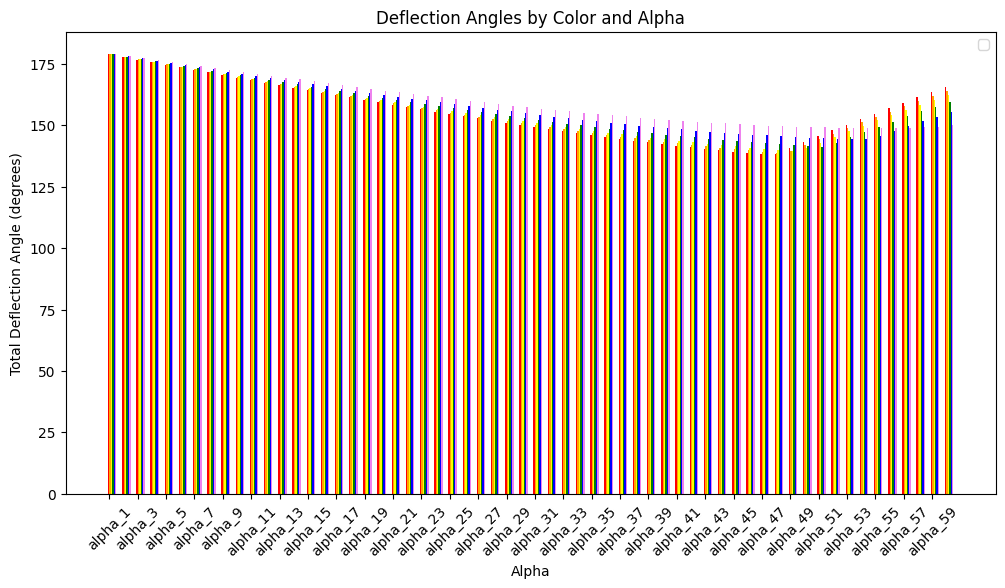

In [30]:
import json

# Load the provided data
file_path = 'exaggerated_rainbow_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

def calculate_deflection_angle(alpha_data, color):
    """
    Calculate the deflection angle for a given color and alpha data.

    Parameters:
    alpha_data (dict): Data for a specific alpha.
    color (str): Color to calculate the deflection angle for.

    Returns:
    float: The deflection angle in degrees.
    """
    # Extract incoming and outgoing ray data
    incoming_x = np.array(alpha_data["incoming"]["xa"])
    incoming_y = np.array(alpha_data["incoming"]["ya"])
    outgoing_x = np.array(alpha_data[color]["xd"])
    outgoing_y = np.array(alpha_data[color]["yd"])

    # Calculate the angles of incoming and outgoing rays
    angle_incoming = np.arctan2(incoming_y[1] - incoming_y[0], incoming_x[1] - incoming_x[0])
    angle_outgoing = np.arctan2(outgoing_y[1] - outgoing_y[0], outgoing_x[1] - outgoing_x[0])

    # Calculate deflection angle
    deflection_angle = np.abs(angle_outgoing - angle_incoming)
    return np.degrees(deflection_angle)

# Calculate deflection angles for each alpha and color
deflection_angles = {}
colors = ["red", "orange", "yellow", "green", "blue", "violet"]
for alpha_key, alpha_data in data.items():
    deflection_angles[alpha_key] = {}
    for color in colors:
        deflection_angle = calculate_deflection_angle(alpha_data, color)
        deflection_angles[alpha_key][color] = deflection_angle

# Plotting the deflection angles in a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each color
for i, color in enumerate(colors):
    ax.bar(index + i * bar_width, color_angles[color], bar_width, color=color)


# Labeling and aesthetics
ax.set_xlabel('Alpha')
ax.set_ylabel('Total Deflection Angle (degrees)')
ax.set_title('Deflection Angles by Color and Alpha')

# Rotate labels and display every second label
ax.set_xticks(index[::2] + bar_width / 2)  # Display every second label
ax.set_xticklabels(alphas[::2], rotation=45)  # Rotate labels by 45 degrees

ax.legend()

plt.show()